<a href="https://colab.research.google.com/github/HenCor2019/practice-02-SIG/blob/main/practice-02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
!pip install geopandas
!pip install rioxarray
#!pip install esda
!pip install pysal
!pip install contextily
!pip install matplotlib_scalebar
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 4.4 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 KB 922.3 kB/s eta 0

In [2]:
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn  # Graphics
import geopandas  # Spatial data manipulation
import pandas  # Tabular data manipulation
#import rioxarray  # Surface data manipulation
#import xarray  # Surface data manipulation
#from pysal.explore import esda  # Exploratory Spatial analytics
#from pysal.lib import weights  # Spatial weights
from matplotlib_scalebar.scalebar import ScaleBar
import contextily  # Background tiles

In [29]:
DB_ESCUELAS = geopandas.read_file(
    "https://raw.githubusercontent.com/HenCor2019/practice-02-SIG/main/databases/escuelas.geojson"
).set_index("fid").to_crs(32619) 
DB_DIGESTYC = geopandas.read_file(
    "https://raw.githubusercontent.com/HenCor2019/practice-02-SIG/main/databases/poblacion_digestyc.geojson"
).set_index("fid").to_crs(32619) 

In [30]:
db_escuelas = (geopandas.GeoDataFrame(DB_ESCUELAS))
db_escuelas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5081 entries, 1 to 5081
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CODIGO      5081 non-null   object  
 1   ESTATUS     4986 non-null   object  
 2   LAMBERTX    5081 non-null   int64   
 3   LAMBERTY    5081 non-null   int64   
 4   LATGRADOS   5081 non-null   int64   
 5   LATMIN      5081 non-null   int64   
 6   LATSEG      5081 non-null   int64   
 7   LONGRADOS   5081 non-null   int64   
 8   LONMIN      5081 non-null   int64   
 9   LONSEG      5081 non-null   int64   
 10  ALTURA      5081 non-null   int64   
 11  EPE         5081 non-null   int64   
 12  CAN_SATELI  5081 non-null   int64   
 13  NOMBRE_CEN  5081 non-null   object  
 14  MODALIDA_1  5081 non-null   object  
 15  DIRECCION   5081 non-null   object  
 16  DEPARTAMEN  5081 non-null   object  
 17  MUNICIPIO   5081 non-null   object  
 18  CANTON      4585 non-null   object  
 19

Text(0.1, 0.19999999999999998, 'N')

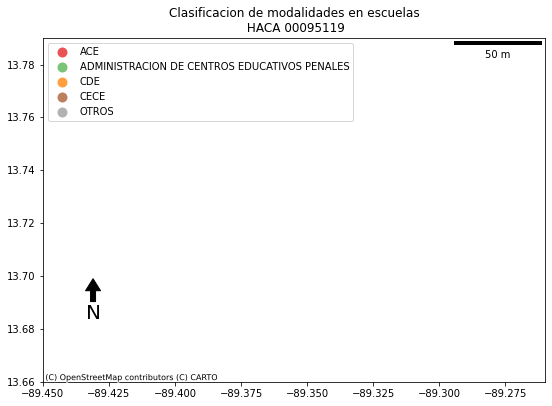

In [31]:
# Set up figure and a single axis
f, ax = plt.subplots(1, figsize=(9, 9))
plt.title("Clasificacion de modalidades en escuelas\n HACA 00095119")
# Build choropleth
db_escuelas.plot(
    column="MODALIDA_1",
    cmap="Set1",
    edgecolor="black",
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    categorical=1,
    ax=ax,
)
#Escala
scalebar = ScaleBar(1.5, "km")
ax.add_artist(scalebar)
# Add basemap
contextily.add_basemap(
    ax,
    crs=db_escuelas.crs,
    zoom =12,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)
plt.xlim(-89.45,-89.26)
plt.ylim(13.66,13.79)
x, y, arrow_length = 0.1, 0.3, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

In [17]:
db_digestyc = (geopandas.GeoDataFrame(DB_DIGESTYC))
db_digestyc["Densidad_anual_2015"]=db_digestyc['_dig_POB_2015']/db_digestyc['areaAREA_KM2']
db_digestyc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 262 entries, 1 to 271
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   NOM_DPTO                   262 non-null    object  
 1   COD_DPTO                   262 non-null    object  
 2   NOM_MUN                    262 non-null    object  
 3   COD_MUN                    262 non-null    object  
 4   COD_MUN4                   262 non-null    object  
 5   TASA_POBR                  262 non-null    float64 
 6   POBR_FISDL                 262 non-null    object  
 7   POB_TOTAL                  262 non-null    int64   
 8   POB_HOMB                   262 non-null    int64   
 9   POB_MUJER                  262 non-null    int64   
 10  _dig_Codigo_Municipio_Alf  262 non-null    int64   
 11  _dig_Municipio             262 non-null    object  
 12  _dig_POB_2008              262 non-null    int64   
 13  _dig_POB_2009              

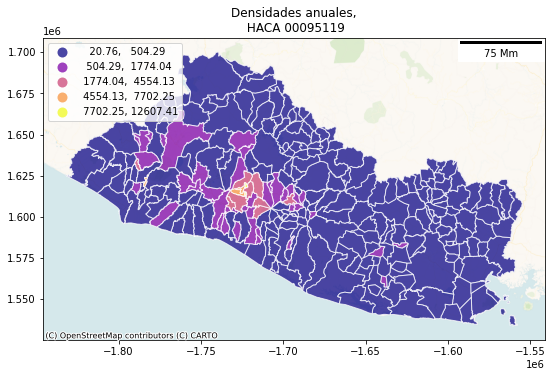

In [22]:
# Set up figure and a single axis
f, ax = plt.subplots(1, figsize=(9, 9))
plt.title("Densidades anuales,\n HACA 00095119")
# Build choropleth
db_digestyc.plot(
    column="Densidad_anual_2015",
    cmap="plasma",
    edgecolor="white",
    alpha=0.75,
    scheme="HeadTailBreaks",
    k=7,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

#Escala
scalebar = ScaleBar(1.5, "km")
ax.add_artist(scalebar)

# Add basemap
contextily.add_basemap(
    ax,
    crs=db_digestyc.crs,
    zoom =12,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)

As in the previous chapter, we require a spatial weights matrix to implement our statistic. Here, we will use eight nearest neighbors for the sake of the example, but the discussion in the earlier chapter on weights applies in this context, and other criteria would be valid too. We also row-standardize them:


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


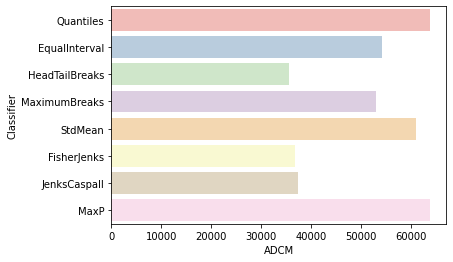

In [20]:
!pip install mapclassify
import mapclassify
import numpy
#Intervalos iguales
ei5 = mapclassify.EqualInterval(db_digestyc["Densidad_anual_2015"], k=5)
ei5
#Cuantiles
q5 = mapclassify.Quantiles(db_digestyc.Densidad_anual_2015, k=5)
q5
#Mean standard deviation
msd = mapclassify.StdMean(db_digestyc["Densidad_anual_2015"])
msd

mb5 = mapclassify.MaximumBreaks(db_digestyc["Densidad_anual_2015"], k=5)
mb5
#Boxplot
bp = mapclassify.BoxPlot(db_digestyc["Densidad_anual_2015"])
bp

ht = mapclassify.HeadTailBreaks(db_digestyc["Densidad_anual_2015"])
ht
#Jenks caspall
numpy.random.seed(12345)
jc5 = mapclassify.JenksCaspall(db_digestyc["Densidad_anual_2015"], k=5)
jc5
#FisherJenks
numpy.random.seed(12345)
fj5 = mapclassify.FisherJenks(db_digestyc["Densidad_anual_2015"], k=5)
fj5

mp5 = mapclassify.MaxP(db_digestyc["Densidad_anual_2015"], k=5)
mp5
# Bunch classifier objects
class5 = q5, ei5, ht, mb5, msd, fj5, jc5, mp5
#print(class5)
# Collect ADCM for each classifier
fits = numpy.array([c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pandas.DataFrame(fits)
# Add classifier names
adcms["classifier"] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ["ADCM", "Classifier"]
ax = seaborn.barplot(
    y="Classifier", x="ADCM", data=adcms, palette="Pastel1"
)

In [ ]:
#print(fits)
#print(adcms)
print(class5)
#print(q5)

(Quantiles               

    Interval       Count
------------------------
[  0.00,   0.00] |    64
(  0.00,  20.42] |    41
( 20.42,  32.63] |    52
( 32.63,  51.64] |    52
( 51.64, 497.78] |    53, EqualInterval           

    Interval       Count
------------------------
[  0.00,  99.56] |   251
( 99.56, 199.11] |     9
(199.11, 298.67] |     1
(298.67, 398.22] |     0
(398.22, 497.78] |     1, HeadTailBreaks          

    Interval       Count
------------------------
[  0.00,  34.07] |   166
( 34.07,  69.29] |    67
( 69.29, 118.39] |    20
(118.39, 197.17] |     7
(197.17, 385.44] |     1
(385.44, 497.78] |     1, MaximumBreaks           

    Interval       Count
------------------------
[  0.00, 100.03] |   251
(100.03, 169.35] |     8
(169.35, 229.60] |     1
(229.60, 385.44] |     1
(385.44, 497.78] |     1, StdMean                 

    Interval       Count
------------------------
(  -inf, -55.54] |     0
(-55.54, -10.73] |     0
(-10.73,  78.87] |   243
( 78.87, 123.68

In [ ]:
# Append class values as a separate column
db["Quantiles"] = q5.yb
db["Equal Interval"] = ei5.yb
db["Head-Tail Breaks"] = ht.yb
db["Maximum Breaks"] = mb5.yb
db["Mean-Standard Deviation"] = msd.yb
db["Fisher-Jenks"] = fj5.yb
db["Jenks Caspall"] = jc5.yb
db["MaxP"] = mp5.yb

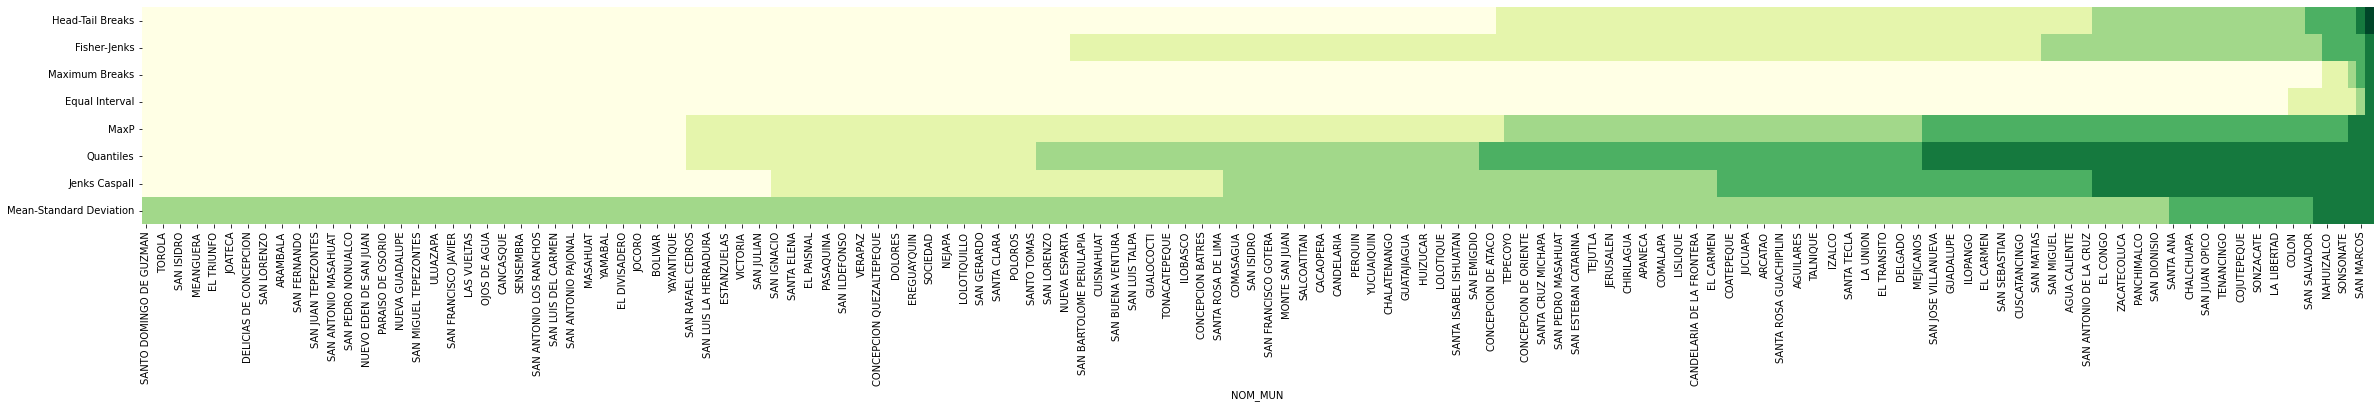

In [ ]:
f, ax = plt.subplots(1, figsize=(40, 4))
seaborn.heatmap(
    db.set_index("NOM_MUN")
    .sort_values("HR2018")[
        [
            "Head-Tail Breaks",
            "Fisher-Jenks",
            "Maximum Breaks",
            "Equal Interval",
            "MaxP",
            "Quantiles",
            "Jenks Caspall",
            "Mean-Standard Deviation",
        ]
    ]
    .T,
    cmap="YlGn",
    cbar=False,
    ax=ax,
)
ax.set_xlabel("NOM_MUN");